In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix

In [2]:
preprocessed_file_path = ('preprocessed_joined_df.csv')
input_df = pd.read_csv(preprocessed_file_path)

input_df.head().T

,0,1,2,3,4
SEX,0,1,1,0,0
HISTORY_OF_CANCER,0,0,0,1,0
VITAL_STATUS,1,1,1,0,1
OS_STATUS,1,1,1,0,1
DSS_STATUS,1,1,0,0,1
...,...,...,...,...,...
ICRSCORE,5.541343,4.817556,7.909826,6.577636,7.37415
MBR_SCORE,0.056723,0.070731,0.161886,-0.353789,0.327006
MICROSCORE,0.0,0.0,0.0,1.0,0.0
TMB_NONSYNONYMOUS,5.233333,2.766667,2.766667,2.433333,3.6


### Calculate the bin edges

In [3]:
def calculate_bin_edges(data, num_bins):
    # Sort the data
    sorted_data = np.sort(data)
    
    # Calculate the number of samples per bin
    samples_per_bin = len(sorted_data) // num_bins

    # Initialize an empty list for bin edges
    bin_edges = []

    # Determine the bin edges
    for i in range(num_bins):
        edge_value = sorted_data[i * samples_per_bin]
        bin_edges.append(edge_value)

    # Append the last value of the sorted data to the list of bin edges
    bin_edges.append(sorted_data[-1])

    # # Plot the histogram
    # counts, bins, patches = plt.hist(data, bins=bin_edges, edgecolor='black', rwidth=0.97)
    # plt.title('Histogram with Bins')
    # plt.xlabel('PFS Months')
    # plt.ylabel('No. of observations')

    # # Set y-ticks based on the counts
    # plt.yticks(np.arange(0, max(counts) + 1, step=max(counts) // num_bins))

    # plt.xticks(bin_edges, rotation=45)
    # plt.show()

    # # Print bin intervals and counts
    # for i in range(len(bin_edges) - 1):
    #     bin_interval = f"{bin_edges[i]} to {bin_edges[i+1]}"
    #     bin_count = counts[i]
    #     print(f"Bin {i+1}: Interval = {bin_interval}, Count = {bin_count}")

    return bin_edges

### Assign class labels

In [4]:

def assign_class_labels(data, bin_edges):
    # Initialize an array to store class labels
    class_labels = np.zeros(len(data), dtype=int)

    # Assign class labels based on bin edges
    for i in range(len(bin_edges) - 1):
        class_labels[(data >= bin_edges[i]) & (data <= bin_edges[i + 1])] = i + 1
    
    return class_labels

### Splitting data to test-train

In [5]:
def split_data(data, labels, ratio):
    # Split the data and labels into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=(1 - ratio), random_state=42)
    return x_train, x_test, y_train, y_test

### Defining the classifiers

In [6]:
def define_classifiers(x_train, y_train, x_test, y_test):
    classifiers = {
        "Logistic Regression": LogisticRegression(),
        "Decision Tree": DecisionTreeClassifier(),
        "Random Forest": RandomForestClassifier(random_state=55),
        "Support Vector Machine": SVC(),
        "K-Nearest Neighbors": KNeighborsClassifier(),
        "Naive Bayes": GaussianNB()
    }

    metrics = {
        "classifier": [],
        "accuracy": [],
        "f1_score": []
    }

    # Train and evaluate classifiers
    for name, clf in classifiers.items():
        clf.fit(x_train, y_train)
        y_pred = clf.predict(x_test)
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='weighted')
        # conf_matrix = confusion_matrix(y_test, y_pred)
        
        metrics["classifier"].append(name)
        metrics["accuracy"].append(accuracy)
        metrics["f1_score"].append(f1)

        print(f"Classifier: {name}")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"F1 Score: {f1:.4f}")
        print("="*50)
        
        # # Plot the confusion matrix
        # plt.figure(figsize=(10, 7))
        # sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
        # plt.title(f"Confusion Matrix for {name}")
        # plt.xlabel('Predicted Labels')
        # plt.ylabel('True Labels')
        # plt.show()
    return metrics

### Analysis of results

#### Original implementation

In [7]:
patient_df = input_df.copy()

Running experiment with 2 bins
Training features shape: (278, 89)
Testing features shape: (70, 89)
Training labels shape: (278,)
Testing labels shape: (70,)
Classifier: Logistic Regression
Accuracy: 0.9286
F1 Score: 0.9286
Classifier: Decision Tree
Accuracy: 0.9857
F1 Score: 0.9857
Classifier: Random Forest
Accuracy: 0.9857
F1 Score: 0.9857
Classifier: Support Vector Machine
Accuracy: 0.8000
F1 Score: 0.7985
Classifier: K-Nearest Neighbors
Accuracy: 0.8429
F1 Score: 0.8428
Classifier: Naive Bayes
Accuracy: 0.8143
F1 Score: 0.8096
Running experiment with 3 bins
Training features shape: (278, 89)
Testing features shape: (70, 89)
Training labels shape: (278,)
Testing labels shape: (70,)
Classifier: Logistic Regression
Accuracy: 0.8571
F1 Score: 0.8582
Classifier: Decision Tree
Accuracy: 0.9429
F1 Score: 0.9424


/opt/anaconda3/envs/cancer_project1/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/cancer_project1/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

Classifier: Random Forest
Accuracy: 0.9571
F1 Score: 0.9574
Classifier: Support Vector Machine
Accuracy: 0.7000
F1 Score: 0.7013
Classifier: K-Nearest Neighbors
Accuracy: 0.7000
F1 Score: 0.7014
Classifier: Naive Bayes
Accuracy: 0.6714
F1 Score: 0.6178
Running experiment with 4 bins
Training features shape: (278, 89)
Testing features shape: (70, 89)
Training labels shape: (278,)
Testing labels shape: (70,)
Classifier: Logistic Regression
Accuracy: 0.7143
F1 Score: 0.6949
Classifier: Decision Tree
Accuracy: 0.8571
F1 Score: 0.8542
Classifier: Random Forest
Accuracy: 0.8429
F1 Score: 0.8372
Classifier: Support Vector Machine
Accuracy: 0.5714
F1 Score: 0.5847
Classifier: K-Nearest Neighbors
Accuracy: 0.6714
F1 Score: 0.6716
Classifier: Naive Bayes
Accuracy: 0.5000
F1 Score: 0.4253


/opt/anaconda3/envs/cancer_project1/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


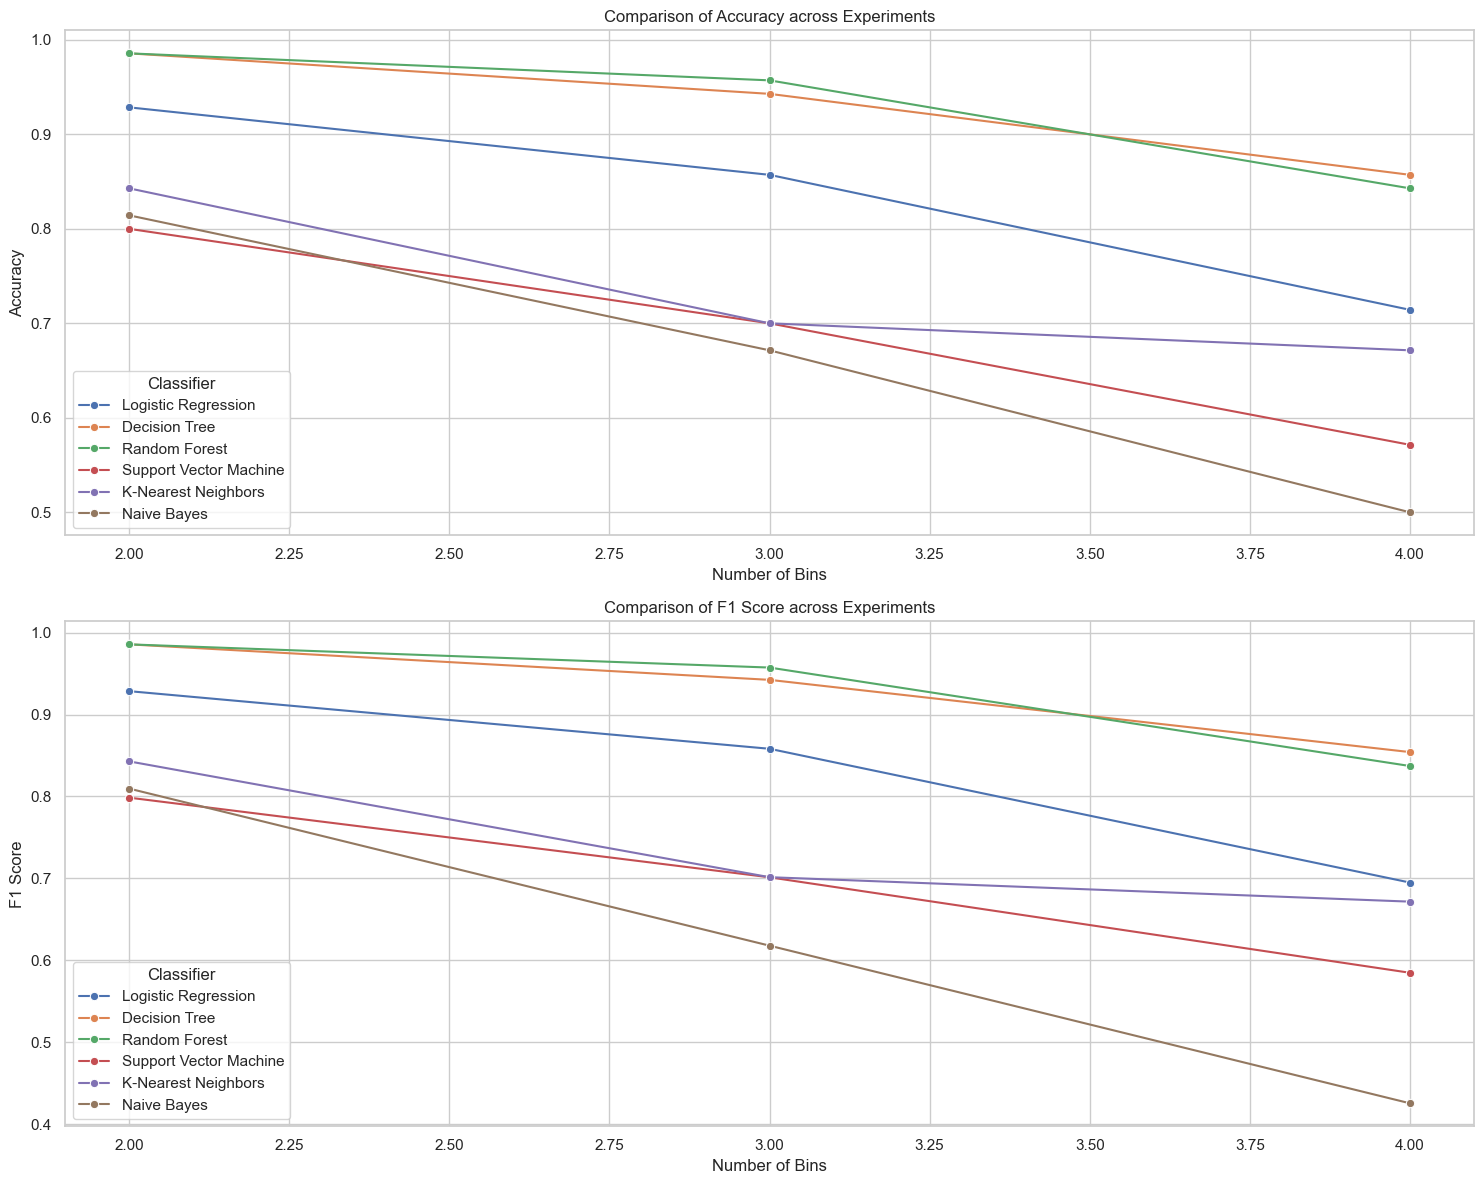

In [8]:
experiment_results = []

for num_bins in [2, 3, 4]:
    print(f"Running experiment with {num_bins} bins")
    
    # Extract the PFS (Progression-Free Survival) values
    pfs_values = patient_df['PFS_MONTHS'].dropna().values
    bin_edges = calculate_bin_edges(pfs_values, num_bins)

    # Assign class labels based on bin edges
    class_labels = assign_class_labels(pfs_values, bin_edges)

    # Split data into features (X) and labels (y)
    X = patient_df.drop(columns=['PFS_MONTHS']).values  # Assuming other features are in the DataFrame
    y = class_labels

    # Split data into training and testing sets
    ratio = 0.8  # 80% training data, 20% testing data
    x_train, x_test, y_train, y_test = split_data(X, y, ratio)

    print("Training features shape:", x_train.shape)
    print("Testing features shape:", x_test.shape)
    print("Training labels shape:", y_train.shape)
    print("Testing labels shape:", y_test.shape)

    metrics = define_classifiers(x_train, y_train, x_test, y_test)
    experiment_results.append({
        "num_bins": num_bins,
        "metrics": metrics
    })

# # Display overall results
# for experiment in experiment_results:
#     num_bins = experiment["num_bins"]
#     metrics = experiment["metrics"]
#     print(f"Experiment with {num_bins} bins:")
#     for i in range(len(metrics["classifier"])):
#         print(f"Classifier: {metrics['classifier'][i]}, Accuracy: {metrics['accuracy'][i]:.4f}, F1 Score: {metrics['f1_score'][i]:.4f}")
#     print("="*50)

# Prepare data for plotting
plot_data = []
for experiment in experiment_results:
    num_bins = experiment["num_bins"]
    metrics = experiment["metrics"]
    for i in range(len(metrics["classifier"])):
        plot_data.append({
            "num_bins": num_bins,
            "classifier": metrics["classifier"][i],
            "accuracy": metrics["accuracy"][i],
            "f1_score": metrics["f1_score"][i]
        })

plot_df = pd.DataFrame(plot_data)

# Plot the results using seaborn
sns.set(style="whitegrid")

fig, axes = plt.subplots(2, 1, figsize=(15, 12))

sns.lineplot(data=plot_df, x="num_bins", y="accuracy", hue="classifier", marker="o", ax=axes[0])
axes[0].set_title("Comparison of Accuracy across Experiments")
axes[0].set_xlabel("Number of Bins")
axes[0].set_ylabel("Accuracy")
axes[0].legend(title="Classifier")

sns.lineplot(data=plot_df, x="num_bins", y="f1_score", hue="classifier", marker="o", ax=axes[1])
axes[1].set_title("Comparison of F1 Score across Experiments")
axes[1].set_xlabel("Number of Bins")
axes[1].set_ylabel("F1 Score")
axes[1].legend(title="Classifier")

plt.tight_layout()
plt.show()

In [9]:
plot_df.groupby("num_bins").agg(
    max_accuracy=("accuracy", "max"),
    max_f1_score=("f1_score", "max")
).reset_index()

,num_bins,max_accuracy,max_f1_score
0,2,0.985714,0.985711
1,3,0.957143,0.957381
2,4,0.857143,0.854169


#### Exp 1: Remove columns revealing about recurrence (not available to doctor beforehand)

In [20]:
del patient_df
input_df

,SEX,HISTORY_OF_CANCER,VITAL_STATUS,OS_STATUS,DSS_STATUS,ICR_HML,MICROBIOME_COHORT,MBR_GROUP,TUMOR_ANATOMIC_LOCATION_Ceceum,TUMOR_ANATOMIC_LOCATION_Colon Ascendens,...,CLINICAL_M_STAGE,AGE_AT_DX,OS_MONTHS,DSS_MONTHS,PFS_MONTHS,ICRSCORE,MBR_SCORE,MICROSCORE,TMB_NONSYNONYMOUS,Mutation_Count
0,0,0,1,1,1,0,1,0,False,False,...,0.0,39,31.05,31.05,21.22,5.541343,0.056723,0.0,5.233333,158.0
1,1,0,1,1,1,0,0,0,False,False,...,0.0,79,51.94,51.94,25.30,4.817556,0.070731,0.0,2.766667,67.0
2,1,0,1,1,0,2,0,0,False,False,...,0.0,71,13.77,13.77,13.77,7.909826,0.161886,0.0,2.766667,67.0
3,0,1,0,0,0,1,1,0,False,False,...,0.0,78,206.29,206.29,206.29,6.577636,-0.353789,1.0,2.433333,74.0
4,0,0,1,1,1,1,1,0,False,True,...,0.0,50,17.31,17.31,9.59,7.374150,0.327006,0.0,3.600000,113.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,1,0,0,0,0,2,1,1,False,False,...,0.0,63,45.87,45.87,45.87,8.317119,-0.088855,1.0,3.366667,102.0
344,0,0,1,1,0,1,1,0,False,False,...,0.0,74,136.28,0.13,136.28,6.514076,0.004501,0.0,3.366667,101.0
345,1,0,1,1,0,1,1,0,False,False,...,0.0,57,78.42,78.42,3.29,6.283394,-0.353789,0.0,2.333333,72.0
346,0,0,0,0,0,2,1,1,False,False,...,0.0,26,182.90,182.90,182.90,8.298335,-0.085652,1.0,42.900000,1310.0


In [21]:
num_bins = 2
pfs_values = input_df['PFS_MONTHS'].dropna().values
bin_edges = calculate_bin_edges(pfs_values, num_bins)
class_labels = assign_class_labels(pfs_values, bin_edges)

exp_df = input_df.copy()
exp_df["bins"] = class_labels

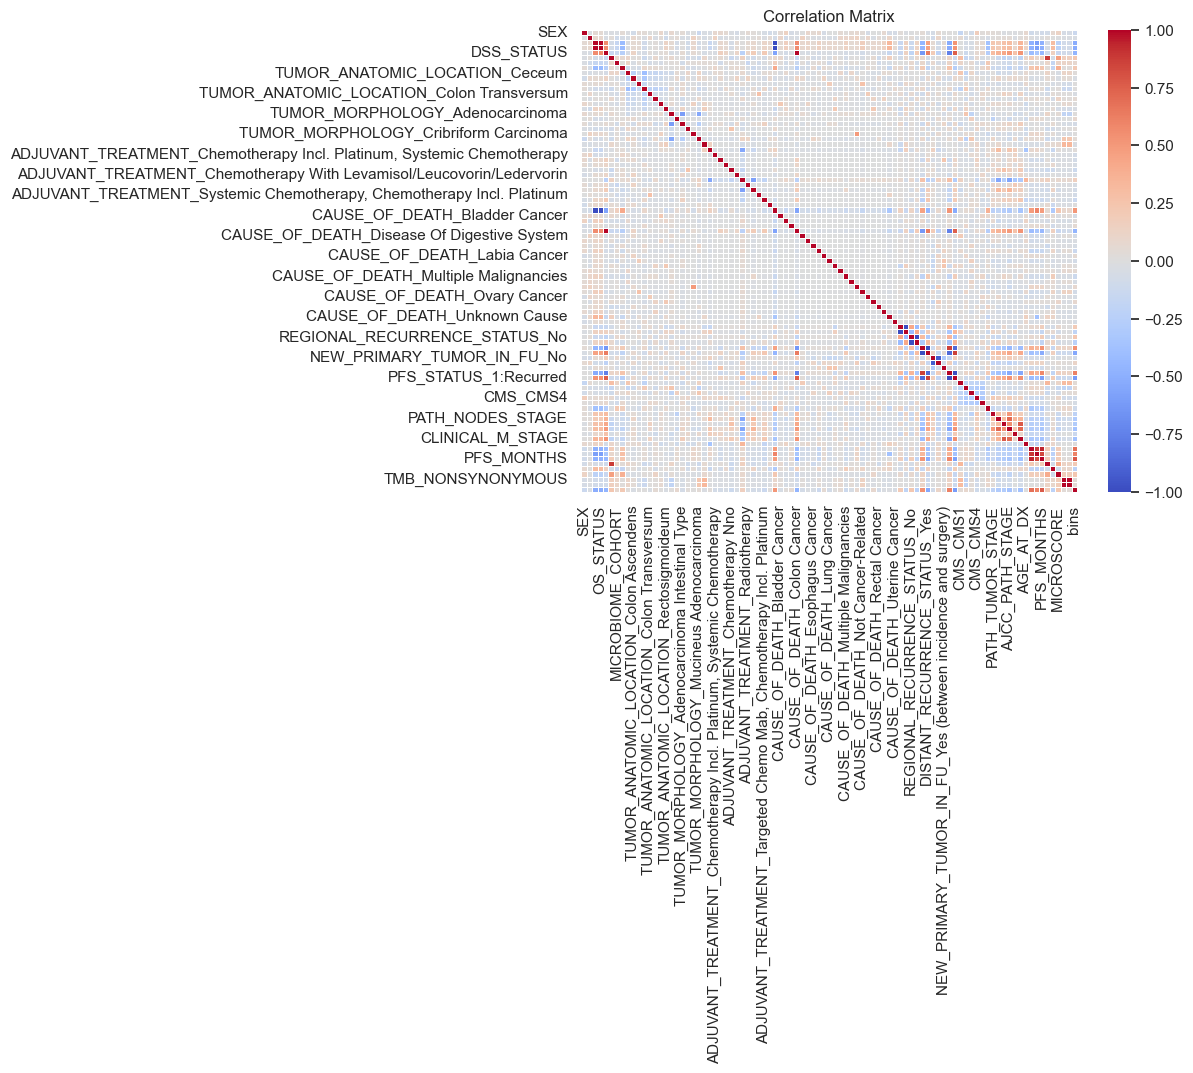

In [22]:
corr_matrix = exp_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [30]:
print("Highest correlation columns with target bin category")
corr_matrix['bins'].abs().sort_values(ascending=False)[:20]

Highest correlation columns with target bin category


bins                              1.000000
PFS_MONTHS                        0.767481
OS_MONTHS                         0.687417
PFS_STATUS_1:Recurred             0.613371
PFS_STATUS_0:DiseaseFree          0.613371
DSS_MONTHS                        0.608489
DISTANT_RECURRENCE_STATUS_Yes     0.542108
DISTANT_RECURRENCE_STATUS_No      0.542108
CAUSE_OF_DEATH_Alive              0.508475
OS_STATUS                         0.508475
VITAL_STATUS                      0.508475
DSS_STATUS                        0.468191
CAUSE_OF_DEATH_Colon Cancer       0.468191
CLINICAL_M_STAGE                  0.370331
AJCC_PATH_STAGE                   0.363177
PATH_NODES_STAGE                  0.292314
PATH_METASTASIS_STAGE             0.282391
REGIONAL_RECURRENCE_STATUS_No     0.233550
REGIONAL_RECURRENCE_STATUS_Yes    0.233550
ICR_HML                           0.228196
Name: bins, dtype: float64

In [31]:
exp_df2 = exp_df.drop(
    axis=1,
    columns=
    [
        "OS_MONTHS",
        "PFS_STATUS_1:Recurred", 
        "PFS_STATUS_0:DiseaseFree",
        "DSS_MONTHS", 
        "DISTANT_RECURRENCE_STATUS_Yes", 
        "DISTANT_RECURRENCE_STATUS_No",
        "CAUSE_OF_DEATH_Alive", 
        "VITAL_STATUS",
        "OS_STATUS", 
        "DSS_STATUS",
        "CAUSE_OF_DEATH_Colon Cancer",
        "REGIONAL_RECURRENCE_STATUS_No",
        "REGIONAL_RECURRENCE_STATUS_Yes",
        "LOCAL_RECURRENCE_STATUS_Yes",
        "LOCAL_RECURRENCE_STATUS_No",
        "CAUSE_OF_DEATH_Infection",
        "CAUSE_OF_DEATH_Multiple Malignancies",
        "CAUSE_OF_DEATH_Not Cancer-Related",
        "CAUSE_OF_DEATH_Disease Of Digestive System",
        "CAUSE_OF_DEATH_Lung Cancer",
        "CAUSE_OF_DEATH_Pancreatic Tumor",
        "CAUSE_OF_DEATH_Non-Hodgkin Lymphoma",
        "CAUSE_OF_DEATH_Rectal Cancer",
        "CAUSE_OF_DEATH_Ovary Cancer",
        "CAUSE_OF_DEATH_Uterine Cancer",
        "CAUSE_OF_DEATH_Myeloid Leukemia",
        "CAUSE_OF_DEATH_Mesothelioma",
        "CAUSE_OF_DEATH_Esophagus Cancer",
        "CAUSE_OF_DEATH_Cns-Related Illness",
        "CAUSE_OF_DEATH_Labia Cancer",
        "CAUSE_OF_DEATH_Bladder Cancer",
        "CAUSE_OF_DEATH_Disease Of Genitourinary System",
        "CAUSE_OF_DEATH_Respiratory Disease",
        "CAUSE_OF_DEATH_Unknown Cause",
        "CAUSE_OF_DEATH_Cardiovascular Disease",
        "CAUSE_OF_DEATH_Malignant Brain Tumor",
        "CAUSE_OF_DEATH_Accident",
        "PATIENT_ID", 
        "bins"
            ])

In [32]:
patient_df = exp_df2.copy()

In [34]:
patient_df.columns

Index(['SEX', 'HISTORY_OF_CANCER', 'ICR_HML', 'MICROBIOME_COHORT', 'MBR_GROUP',
       'TUMOR_ANATOMIC_LOCATION_Ceceum',
       'TUMOR_ANATOMIC_LOCATION_Colon Ascendens',
       'TUMOR_ANATOMIC_LOCATION_Colon Descendens',
       'TUMOR_ANATOMIC_LOCATION_Colon Sigmoideum',
       'TUMOR_ANATOMIC_LOCATION_Colon Transversum',
       'TUMOR_ANATOMIC_LOCATION_Flexura Hepatica',
       'TUMOR_ANATOMIC_LOCATION_Flexura Lienalis',
       'TUMOR_ANATOMIC_LOCATION_Rectosigmoideum',
       'TUMOR_MORPHOLOGY_Adenocarcinoma',
       'TUMOR_MORPHOLOGY_Adenocarcinoma In Villeus Adenoma',
       'TUMOR_MORPHOLOGY_Adenocarcinoma Intestinal Type',
       'TUMOR_MORPHOLOGY_Adenocarcinoma With Mixed Subtypes',
       'TUMOR_MORPHOLOGY_Cribriform Carcinoma',
       'TUMOR_MORPHOLOGY_Mucineus Adenocarcinoma',
       'TUMOR_MORPHOLOGY_Signet Ring Cell Carcinoma',
       'ADJUVANT_TREATMENT_Chemotherapy Incl. Platinum',
       'ADJUVANT_TREATMENT_Chemotherapy Incl. Platinum, Systemic Chemotherapy',
       'AD

Running experiment with 2 bins
Training features shape: (278, 51)
Testing features shape: (70, 51)
Training labels shape: (278,)
Testing labels shape: (70,)
Classifier: Logistic Regression
Accuracy: 0.7143
F1 Score: 0.7143
Classifier: Decision Tree
Accuracy: 0.6714
F1 Score: 0.6714
Classifier: Random Forest
Accuracy: 0.6571
F1 Score: 0.6546
Classifier: Support Vector Machine
Accuracy: 0.5429
F1 Score: 0.4928
Classifier: K-Nearest Neighbors
Accuracy: 0.4429
F1 Score: 0.4427
Classifier: Naive Bayes
Accuracy: 0.6143
F1 Score: 0.5836
Running experiment with 3 bins
Training features shape: (278, 51)
Testing features shape: (70, 51)
Training labels shape: (278,)
Testing labels shape: (70,)
Classifier: Logistic Regression
Accuracy: 0.5429
F1 Score: 0.5383
Classifier: Decision Tree
Accuracy: 0.3714
F1 Score: 0.3752


/opt/anaconda3/envs/cancer_project1/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/cancer_project1/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

Classifier: Random Forest
Accuracy: 0.5143
F1 Score: 0.5117
Classifier: Support Vector Machine
Accuracy: 0.4000
F1 Score: 0.3296
Classifier: K-Nearest Neighbors
Accuracy: 0.2714
F1 Score: 0.2662
Classifier: Naive Bayes
Accuracy: 0.4571
F1 Score: 0.4132
Running experiment with 4 bins
Training features shape: (278, 51)
Testing features shape: (70, 51)
Training labels shape: (278,)
Testing labels shape: (70,)
Classifier: Logistic Regression
Accuracy: 0.3571
F1 Score: 0.3451
Classifier: Decision Tree
Accuracy: 0.2571
F1 Score: 0.2381
Classifier: Random Forest
Accuracy: 0.3714
F1 Score: 0.3616
Classifier: Support Vector Machine
Accuracy: 0.2714
F1 Score: 0.1828
Classifier: K-Nearest Neighbors
Accuracy: 0.2000
F1 Score: 0.1967
Classifier: Naive Bayes
Accuracy: 0.3714
F1 Score: 0.2988


/opt/anaconda3/envs/cancer_project1/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


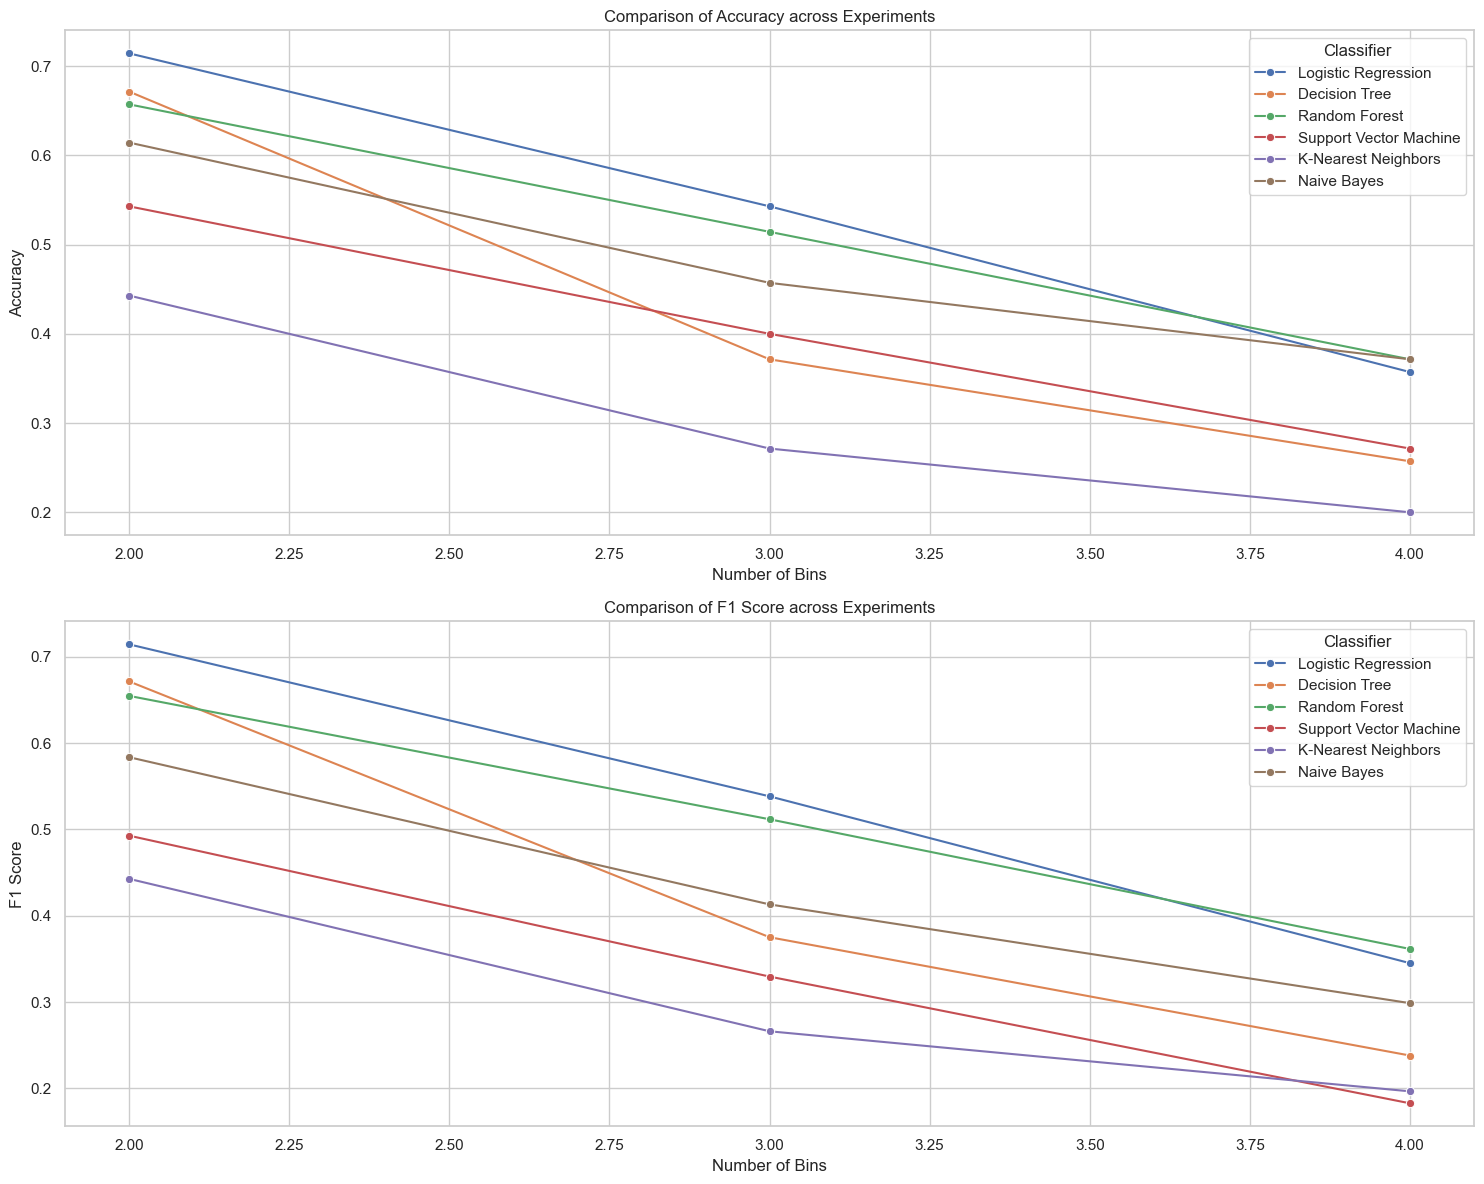

In [35]:
experiment_results = []

for num_bins in [2, 3, 4]:
    print(f"Running experiment with {num_bins} bins")
    
    # Extract the PFS (Progression-Free Survival) values
    pfs_values = patient_df['PFS_MONTHS'].dropna().values
    bin_edges = calculate_bin_edges(pfs_values, num_bins)

    # Assign class labels based on bin edges
    class_labels = assign_class_labels(pfs_values, bin_edges)

    # Split data into features (X) and labels (y)
    X = patient_df.drop(columns=['PFS_MONTHS']).values  # Assuming other features are in the DataFrame
    y = class_labels

    # Split data into training and testing sets
    ratio = 0.8  # 80% training data, 20% testing data
    x_train, x_test, y_train, y_test = split_data(X, y, ratio)

    print("Training features shape:", x_train.shape)
    print("Testing features shape:", x_test.shape)
    print("Training labels shape:", y_train.shape)
    print("Testing labels shape:", y_test.shape)

    metrics = define_classifiers(x_train, y_train, x_test, y_test)
    experiment_results.append({
        "num_bins": num_bins,
        "metrics": metrics
    })

# # Display overall results
# for experiment in experiment_results:
#     num_bins = experiment["num_bins"]
#     metrics = experiment["metrics"]
#     print(f"Experiment with {num_bins} bins:")
#     for i in range(len(metrics["classifier"])):
#         print(f"Classifier: {metrics['classifier'][i]}, Accuracy: {metrics['accuracy'][i]:.4f}, F1 Score: {metrics['f1_score'][i]:.4f}")
#     print("="*50)

# Prepare data for plotting
plot_data = []
for experiment in experiment_results:
    num_bins = experiment["num_bins"]
    metrics = experiment["metrics"]
    for i in range(len(metrics["classifier"])):
        plot_data.append({
            "num_bins": num_bins,
            "classifier": metrics["classifier"][i],
            "accuracy": metrics["accuracy"][i],
            "f1_score": metrics["f1_score"][i]
        })

plot_df = pd.DataFrame(plot_data)

# Plot the results using seaborn
sns.set(style="whitegrid")

fig, axes = plt.subplots(2, 1, figsize=(15, 12))

sns.lineplot(data=plot_df, x="num_bins", y="accuracy", hue="classifier", marker="o", ax=axes[0])
axes[0].set_title("Comparison of Accuracy across Experiments")
axes[0].set_xlabel("Number of Bins")
axes[0].set_ylabel("Accuracy")
axes[0].legend(title="Classifier")

sns.lineplot(data=plot_df, x="num_bins", y="f1_score", hue="classifier", marker="o", ax=axes[1])
axes[1].set_title("Comparison of F1 Score across Experiments")
axes[1].set_xlabel("Number of Bins")
axes[1].set_ylabel("F1 Score")
axes[1].legend(title="Classifier")

plt.tight_layout()
plt.show()

In [36]:
plot_df.groupby("num_bins").agg(
    max_accuracy=("accuracy", "max"),
    max_f1_score=("f1_score", "max")
).reset_index()

,num_bins,max_accuracy,max_f1_score
0,2,0.714286,0.714286
1,3,0.542857,0.538282
2,4,0.371429,0.361560


#### Exp 2: Remove censored rows

In [39]:
exp_df3 = input_df[input_df["PFS_STATUS_1:Recurred"] == 1]
exp_df3.shape

(109, 90)

In [42]:
exp_df4 = exp_df3.drop(
    axis=1,
    columns=
    [
        "OS_MONTHS",
        "PFS_STATUS_1:Recurred", 
        "PFS_STATUS_0:DiseaseFree",
        "DSS_MONTHS", 
        "DISTANT_RECURRENCE_STATUS_Yes", 
        "DISTANT_RECURRENCE_STATUS_No",
        "CAUSE_OF_DEATH_Alive", 
        "VITAL_STATUS",
        "OS_STATUS", 
        "DSS_STATUS",
        "CAUSE_OF_DEATH_Colon Cancer",
        "REGIONAL_RECURRENCE_STATUS_No",
        "REGIONAL_RECURRENCE_STATUS_Yes",
        "LOCAL_RECURRENCE_STATUS_Yes",
        "LOCAL_RECURRENCE_STATUS_No",
        "CAUSE_OF_DEATH_Infection",
        "CAUSE_OF_DEATH_Multiple Malignancies",
        "CAUSE_OF_DEATH_Not Cancer-Related",
        "CAUSE_OF_DEATH_Disease Of Digestive System",
        "CAUSE_OF_DEATH_Lung Cancer",
        "CAUSE_OF_DEATH_Pancreatic Tumor",
        "CAUSE_OF_DEATH_Non-Hodgkin Lymphoma",
        "CAUSE_OF_DEATH_Rectal Cancer",
        "CAUSE_OF_DEATH_Ovary Cancer",
        "CAUSE_OF_DEATH_Uterine Cancer",
        "CAUSE_OF_DEATH_Myeloid Leukemia",
        "CAUSE_OF_DEATH_Mesothelioma",
        "CAUSE_OF_DEATH_Esophagus Cancer",
        "CAUSE_OF_DEATH_Cns-Related Illness",
        "CAUSE_OF_DEATH_Labia Cancer",
        "CAUSE_OF_DEATH_Bladder Cancer",
        "CAUSE_OF_DEATH_Disease Of Genitourinary System",
        "CAUSE_OF_DEATH_Respiratory Disease",
        "CAUSE_OF_DEATH_Unknown Cause",
        "CAUSE_OF_DEATH_Cardiovascular Disease",
        "CAUSE_OF_DEATH_Malignant Brain Tumor",
        "CAUSE_OF_DEATH_Accident",
        "PATIENT_ID", 
    ])

exp_df4.shape

(109, 52)

In [43]:
patient_df = exp_df4.copy()

In [44]:
patient_df.columns

Index(['SEX', 'HISTORY_OF_CANCER', 'ICR_HML', 'MICROBIOME_COHORT', 'MBR_GROUP',
       'TUMOR_ANATOMIC_LOCATION_Ceceum',
       'TUMOR_ANATOMIC_LOCATION_Colon Ascendens',
       'TUMOR_ANATOMIC_LOCATION_Colon Descendens',
       'TUMOR_ANATOMIC_LOCATION_Colon Sigmoideum',
       'TUMOR_ANATOMIC_LOCATION_Colon Transversum',
       'TUMOR_ANATOMIC_LOCATION_Flexura Hepatica',
       'TUMOR_ANATOMIC_LOCATION_Flexura Lienalis',
       'TUMOR_ANATOMIC_LOCATION_Rectosigmoideum',
       'TUMOR_MORPHOLOGY_Adenocarcinoma',
       'TUMOR_MORPHOLOGY_Adenocarcinoma In Villeus Adenoma',
       'TUMOR_MORPHOLOGY_Adenocarcinoma Intestinal Type',
       'TUMOR_MORPHOLOGY_Adenocarcinoma With Mixed Subtypes',
       'TUMOR_MORPHOLOGY_Cribriform Carcinoma',
       'TUMOR_MORPHOLOGY_Mucineus Adenocarcinoma',
       'TUMOR_MORPHOLOGY_Signet Ring Cell Carcinoma',
       'ADJUVANT_TREATMENT_Chemotherapy Incl. Platinum',
       'ADJUVANT_TREATMENT_Chemotherapy Incl. Platinum, Systemic Chemotherapy',
       'AD

Running experiment with 2 bins
Training features shape: (87, 51)
Testing features shape: (22, 51)
Training labels shape: (87,)
Testing labels shape: (22,)
Classifier: Logistic Regression
Accuracy: 0.6364
F1 Score: 0.6239
Classifier: Decision Tree
Accuracy: 0.5909
F1 Score: 0.5832
Classifier: Random Forest
Accuracy: 0.7727
F1 Score: 0.7684
Classifier: Support Vector Machine
Accuracy: 0.5455
F1 Score: 0.5089
Classifier: K-Nearest Neighbors
Accuracy: 0.5000
F1 Score: 0.4990
Classifier: Naive Bayes
Accuracy: 0.5000
F1 Score: 0.4437
Running experiment with 3 bins
Training features shape: (87, 51)
Testing features shape: (22, 51)
Training labels shape: (87,)
Testing labels shape: (22,)
Classifier: Logistic Regression
Accuracy: 0.3182
F1 Score: 0.3263
Classifier: Decision Tree
Accuracy: 0.2727
F1 Score: 0.2688
Classifier: Random Forest
Accuracy: 0.3636
F1 Score: 0.3645
Classifier: Support Vector Machine
Accuracy: 0.2273
F1 Score: 0.1638
Classifier: K-Nearest Neighbors
Accuracy: 0.2727
F1 Scor

/opt/anaconda3/envs/cancer_project1/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/cancer_project1/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

Classifier: Random Forest
Accuracy: 0.2727
F1 Score: 0.2677
Classifier: Support Vector Machine
Accuracy: 0.2727
F1 Score: 0.1684
Classifier: K-Nearest Neighbors
Accuracy: 0.1818
F1 Score: 0.1784
Classifier: Naive Bayes
Accuracy: 0.2727
F1 Score: 0.2449


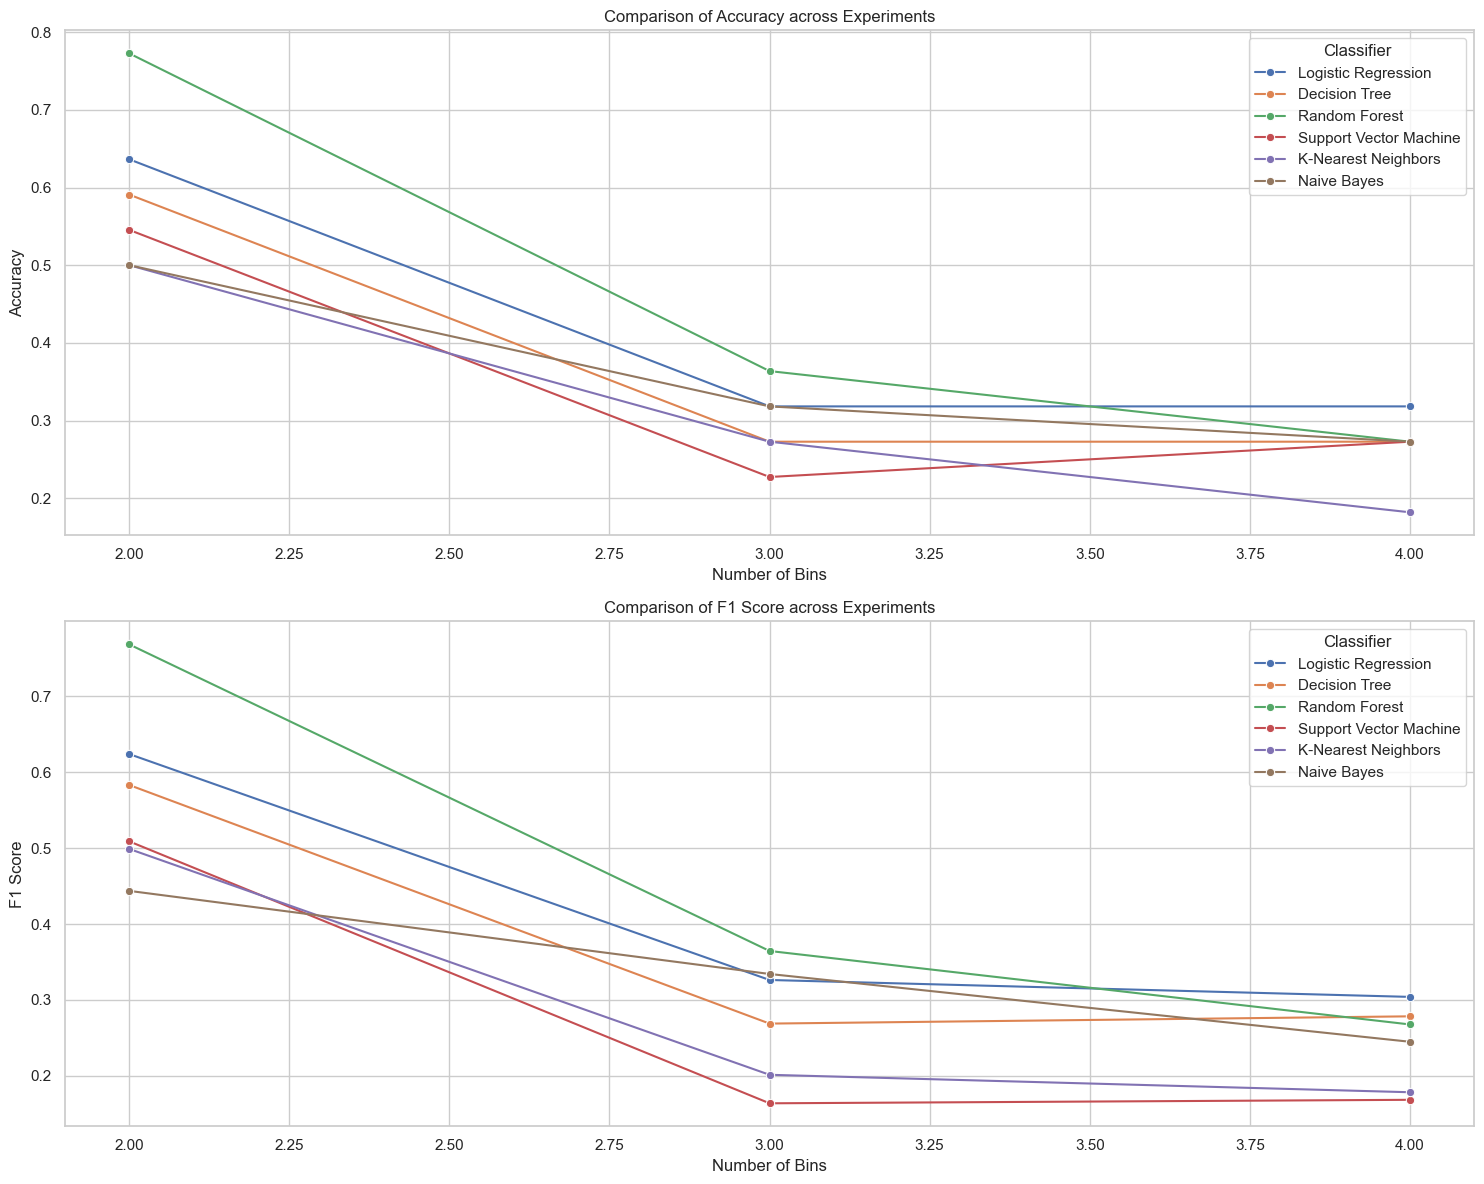

In [45]:
experiment_results = []

for num_bins in [2, 3, 4]:
    print(f"Running experiment with {num_bins} bins")
    
    # Extract the PFS (Progression-Free Survival) values
    pfs_values = patient_df['PFS_MONTHS'].dropna().values
    bin_edges = calculate_bin_edges(pfs_values, num_bins)

    # Assign class labels based on bin edges
    class_labels = assign_class_labels(pfs_values, bin_edges)

    # Split data into features (X) and labels (y)
    X = patient_df.drop(columns=['PFS_MONTHS']).values  # Assuming other features are in the DataFrame
    y = class_labels

    # Split data into training and testing sets
    ratio = 0.8  # 80% training data, 20% testing data
    x_train, x_test, y_train, y_test = split_data(X, y, ratio)

    print("Training features shape:", x_train.shape)
    print("Testing features shape:", x_test.shape)
    print("Training labels shape:", y_train.shape)
    print("Testing labels shape:", y_test.shape)

    metrics = define_classifiers(x_train, y_train, x_test, y_test)
    experiment_results.append({
        "num_bins": num_bins,
        "metrics": metrics
    })

# # Display overall results
# for experiment in experiment_results:
#     num_bins = experiment["num_bins"]
#     metrics = experiment["metrics"]
#     print(f"Experiment with {num_bins} bins:")
#     for i in range(len(metrics["classifier"])):
#         print(f"Classifier: {metrics['classifier'][i]}, Accuracy: {metrics['accuracy'][i]:.4f}, F1 Score: {metrics['f1_score'][i]:.4f}")
#     print("="*50)

# Prepare data for plotting
plot_data = []
for experiment in experiment_results:
    num_bins = experiment["num_bins"]
    metrics = experiment["metrics"]
    for i in range(len(metrics["classifier"])):
        plot_data.append({
            "num_bins": num_bins,
            "classifier": metrics["classifier"][i],
            "accuracy": metrics["accuracy"][i],
            "f1_score": metrics["f1_score"][i]
        })

plot_df = pd.DataFrame(plot_data)

# Plot the results using seaborn
sns.set(style="whitegrid")

fig, axes = plt.subplots(2, 1, figsize=(15, 12))

sns.lineplot(data=plot_df, x="num_bins", y="accuracy", hue="classifier", marker="o", ax=axes[0])
axes[0].set_title("Comparison of Accuracy across Experiments")
axes[0].set_xlabel("Number of Bins")
axes[0].set_ylabel("Accuracy")
axes[0].legend(title="Classifier")

sns.lineplot(data=plot_df, x="num_bins", y="f1_score", hue="classifier", marker="o", ax=axes[1])
axes[1].set_title("Comparison of F1 Score across Experiments")
axes[1].set_xlabel("Number of Bins")
axes[1].set_ylabel("F1 Score")
axes[1].legend(title="Classifier")

plt.tight_layout()
plt.show()

In [46]:
plot_df.groupby("num_bins").agg(
    max_accuracy=("accuracy", "max"),
    max_f1_score=("f1_score", "max")
).reset_index()

,num_bins,max_accuracy,max_f1_score
0,2,0.772727,0.768421
1,3,0.363636,0.364502
2,4,0.318182,0.304014
